<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/BP_hv3_8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 8)                 1024      
_________________________________________________________________
batch_normalization_42 (Batc (None, 8)                 32        
_________________________________________________________________
activation_42 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_43 (Batc (None, 8)                 32        
_________________________________________________________________
activation_43 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 8)                

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 2s 13ms/step - loss: 12413.4277 - val_loss: 12426.8613
Epoch 2/500
165/165 [==============================] - 2s 11ms/step - loss: 12136.9639 - val_loss: 11977.1943
Epoch 3/500
165/165 [==============================] - 2s 11ms/step - loss: 11769.5869 - val_loss: 11308.8809
Epoch 4/500
165/165 [==============================] - 2s 11ms/step - loss: 11311.0703 - val_loss: 10510.4355
Epoch 5/500
165/165 [==============================] - 2s 11ms/step - loss: 10723.3359 - val_loss: 10208.2969
Epoch 6/500
165/165 [==============================] - 2s 11ms/step - loss: 9982.2705 - val_loss: 9780.9590
Epoch 7/500
165/165 [==============================] - 2s 11ms/step - loss: 9115.8525 - val_loss: 9350.4443
Epoch 8/500
165/165 [==============================] - 2s 11ms/step - loss: 8056.0625 - val_loss: 6901.6777
Epoch 9/500
165/165 [==============================] - 2s 11ms/step - loss: 6820.3628 - val_loss: 5795.8013
Epoch 10/500
165/1

165/165 [==============================] - 2s 10ms/step - loss: 146.9017 - val_loss: 149.0202
Epoch 78/500
165/165 [==============================] - 2s 11ms/step - loss: 142.8302 - val_loss: 184.5125
Epoch 79/500
165/165 [==============================] - 2s 10ms/step - loss: 135.8167 - val_loss: 181.1685
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 137.0387 - val_loss: 217.6524
Epoch 81/500
165/165 [==============================] - 2s 11ms/step - loss: 144.1260 - val_loss: 176.5981
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 148.3069 - val_loss: 382.6118
Epoch 83/500
165/165 [==============================] - 2s 10ms/step - loss: 174.3730 - val_loss: 224.3286
Epoch 84/500
165/165 [==============================] - 2s 10ms/step - loss: 188.7648 - val_loss: 272.0720
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 186.5823 - val_loss: 172.9378
Epoch 86/500
165/165 [============================

165/165 [==============================] - 2s 11ms/step - loss: 106.9160 - val_loss: 122.7914
Epoch 154/500
165/165 [==============================] - 2s 11ms/step - loss: 107.0608 - val_loss: 118.9700
Epoch 155/500
165/165 [==============================] - 2s 11ms/step - loss: 106.8389 - val_loss: 155.5064
Epoch 156/500
165/165 [==============================] - 2s 11ms/step - loss: 106.5868 - val_loss: 224.3470
Epoch 157/500
165/165 [==============================] - 2s 11ms/step - loss: 107.3447 - val_loss: 164.7857
Epoch 158/500
165/165 [==============================] - 2s 12ms/step - loss: 107.8857 - val_loss: 168.1666
Epoch 159/500
165/165 [==============================] - 2s 11ms/step - loss: 106.8332 - val_loss: 116.4041
Epoch 160/500
165/165 [==============================] - 2s 11ms/step - loss: 107.2795 - val_loss: 142.9622
Epoch 161/500
165/165 [==============================] - 2s 12ms/step - loss: 107.6515 - val_loss: 126.8602
Epoch 162/500
165/165 [===================

165/165 [==============================] - 2s 11ms/step - loss: 97.3764 - val_loss: 114.9902
Epoch 230/500
165/165 [==============================] - 2s 11ms/step - loss: 96.5345 - val_loss: 206.0852
Epoch 231/500
165/165 [==============================] - 2s 11ms/step - loss: 96.3847 - val_loss: 108.1662
Epoch 232/500
165/165 [==============================] - 2s 11ms/step - loss: 95.7008 - val_loss: 119.7944
Epoch 233/500
165/165 [==============================] - 2s 11ms/step - loss: 95.4584 - val_loss: 137.0208
Epoch 234/500
165/165 [==============================] - 2s 11ms/step - loss: 94.9492 - val_loss: 102.2753
Epoch 235/500
165/165 [==============================] - 2s 11ms/step - loss: 96.6240 - val_loss: 189.5241
Epoch 236/500
165/165 [==============================] - 2s 11ms/step - loss: 95.3652 - val_loss: 100.6655
Epoch 237/500
165/165 [==============================] - 2s 11ms/step - loss: 94.3145 - val_loss: 120.2293
Epoch 238/500
165/165 [============================

165/165 [==============================] - 2s 10ms/step - loss: 89.6332 - val_loss: 100.1040
Epoch 306/500
165/165 [==============================] - 2s 10ms/step - loss: 89.5073 - val_loss: 100.6780
Epoch 307/500
165/165 [==============================] - 2s 10ms/step - loss: 89.4495 - val_loss: 191.2479
Epoch 308/500
165/165 [==============================] - 2s 10ms/step - loss: 90.1152 - val_loss: 127.8593
Epoch 309/500
165/165 [==============================] - 2s 10ms/step - loss: 90.0896 - val_loss: 105.1322
Epoch 310/500
165/165 [==============================] - 2s 11ms/step - loss: 89.9465 - val_loss: 103.7347
Epoch 311/500
165/165 [==============================] - 2s 11ms/step - loss: 89.8731 - val_loss: 112.5565
Epoch 312/500
165/165 [==============================] - 2s 11ms/step - loss: 89.9602 - val_loss: 110.4613
Epoch 313/500
165/165 [==============================] - 2s 11ms/step - loss: 89.3867 - val_loss: 110.1338
Epoch 314/500
165/165 [============================

Epoch 382/500
165/165 [==============================] - 2s 11ms/step - loss: 90.5183 - val_loss: 109.6902
Epoch 383/500
165/165 [==============================] - 2s 11ms/step - loss: 88.8160 - val_loss: 102.4535
Epoch 384/500
165/165 [==============================] - 2s 11ms/step - loss: 88.3342 - val_loss: 97.0156
Epoch 385/500
165/165 [==============================] - 2s 11ms/step - loss: 88.1720 - val_loss: 156.6009
Epoch 386/500
165/165 [==============================] - 2s 10ms/step - loss: 88.7121 - val_loss: 99.9922
Epoch 387/500
165/165 [==============================] - 2s 10ms/step - loss: 88.9113 - val_loss: 143.1286
Epoch 388/500
165/165 [==============================] - 2s 11ms/step - loss: 88.1734 - val_loss: 122.3088
Epoch 389/500
165/165 [==============================] - 2s 10ms/step - loss: 87.8424 - val_loss: 118.8504
Epoch 390/500
165/165 [==============================] - 2s 10ms/step - loss: 87.6185 - val_loss: 99.6540
Epoch 391/500
165/165 [=================

165/165 [==============================] - 2s 10ms/step - loss: 85.7264 - val_loss: 117.8221
Epoch 459/500
165/165 [==============================] - 2s 10ms/step - loss: 86.3359 - val_loss: 110.5189
Epoch 460/500
165/165 [==============================] - 2s 10ms/step - loss: 86.2320 - val_loss: 106.5770
Epoch 461/500
165/165 [==============================] - 2s 10ms/step - loss: 86.1462 - val_loss: 266.4337
Epoch 462/500
165/165 [==============================] - 2s 10ms/step - loss: 86.8622 - val_loss: 102.4337
Epoch 463/500
165/165 [==============================] - 2s 11ms/step - loss: 87.2084 - val_loss: 102.1921
Epoch 464/500
165/165 [==============================] - 2s 11ms/step - loss: 86.5805 - val_loss: 116.2352
Epoch 465/500
165/165 [==============================] - 2s 10ms/step - loss: 85.7758 - val_loss: 97.2011
Epoch 466/500
165/165 [==============================] - 2s 10ms/step - loss: 88.3693 - val_loss: 136.7466
Epoch 467/500
165/165 [=============================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.7485498159107142 
MAE:  8.320481128130838 
SD:  10.569847645632391


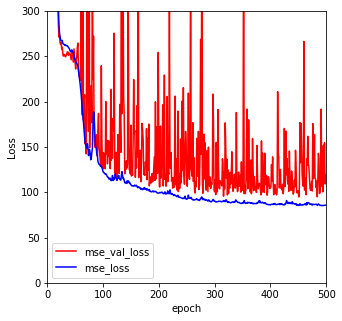

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 8)                 1024      
_________________________________________________________________
batch_normalization_63 (Batc (None, 8)                 32        
_________________________________________________________________
activation_63 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_64 (Batc (None, 8)                 32        
_________________________________________________________________
activation_64 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_68 (Dense)             (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 2s 12ms/step - loss: 12406.0186 - val_loss: 12313.5137
Epoch 2/500
165/165 [==============================] - 2s 10ms/step - loss: 12058.6787 - val_loss: 11936.0283
Epoch 3/500
165/165 [==============================] - 2s 10ms/step - loss: 11673.9346 - val_loss: 11386.6904
Epoch 4/500
165/165 [==============================] - 2s 11ms/step - loss: 11202.3252 - val_loss: 10896.2646
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 10639.0537 - val_loss: 10372.2842
Epoch 6/500
165/165 [==============================] - 2s 10ms/step - loss: 9987.0811 - val_loss: 9577.1846
Epoch 7/500
165/165 [==============================] - 2s 10ms/step - loss: 9282.0420 - val_loss: 8939.8535
Epoch 8/500
165/165 [==============================] - 2s 11ms/step - loss: 8534.7354 - val_loss: 8075.4258
Epoch 9/500
165/165 [==============================] - 2s 10ms/step - loss: 7760.1528 - val_loss: 7276.9985
Epoch 10/500
165/1

Epoch 77/500
165/165 [==============================] - 2s 10ms/step - loss: 172.8630 - val_loss: 190.6996
Epoch 78/500
165/165 [==============================] - 2s 10ms/step - loss: 169.9685 - val_loss: 197.2676
Epoch 79/500
165/165 [==============================] - 2s 10ms/step - loss: 171.7435 - val_loss: 167.2457
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 169.0112 - val_loss: 258.7121
Epoch 81/500
165/165 [==============================] - 2s 10ms/step - loss: 169.1212 - val_loss: 156.8037
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 161.6003 - val_loss: 263.8725
Epoch 83/500
165/165 [==============================] - 2s 10ms/step - loss: 159.7534 - val_loss: 173.0779
Epoch 84/500
165/165 [==============================] - 2s 10ms/step - loss: 151.6982 - val_loss: 148.3346
Epoch 85/500
165/165 [==============================] - ETA: 0s - loss: 148.926 - 2s 10ms/step - loss: 148.9535 - val_loss: 203.7570
Epoch 86/50

Epoch 153/500
165/165 [==============================] - 2s 11ms/step - loss: 108.3695 - val_loss: 211.5007
Epoch 154/500
165/165 [==============================] - 2s 10ms/step - loss: 107.9493 - val_loss: 143.4198
Epoch 155/500
165/165 [==============================] - 2s 10ms/step - loss: 106.9222 - val_loss: 133.3058
Epoch 156/500
165/165 [==============================] - 2s 11ms/step - loss: 108.3967 - val_loss: 179.7940
Epoch 157/500
165/165 [==============================] - 2s 11ms/step - loss: 108.5808 - val_loss: 184.8660
Epoch 158/500
165/165 [==============================] - 2s 10ms/step - loss: 110.7813 - val_loss: 183.4695
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 112.4608 - val_loss: 176.4545
Epoch 160/500
165/165 [==============================] - 2s 10ms/step - loss: 112.0085 - val_loss: 179.0397
Epoch 161/500
165/165 [==============================] - 2s 10ms/step - loss: 113.0928 - val_loss: 206.3781
Epoch 162/500
165/165 [=====

Epoch 229/500
165/165 [==============================] - 2s 11ms/step - loss: 110.0257 - val_loss: 321.6561
Epoch 230/500
165/165 [==============================] - 2s 11ms/step - loss: 108.2697 - val_loss: 179.8416
Epoch 231/500
165/165 [==============================] - 2s 11ms/step - loss: 107.9767 - val_loss: 149.9060
Epoch 232/500
165/165 [==============================] - 2s 11ms/step - loss: 109.7701 - val_loss: 337.9929
Epoch 233/500
165/165 [==============================] - 2s 10ms/step - loss: 117.0479 - val_loss: 133.7896
Epoch 234/500
165/165 [==============================] - 2s 11ms/step - loss: 110.4352 - val_loss: 289.0583
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 106.9959 - val_loss: 222.1791
Epoch 236/500
165/165 [==============================] - 2s 11ms/step - loss: 106.9404 - val_loss: 153.2147
Epoch 237/500
165/165 [==============================] - 2s 11ms/step - loss: 107.2721 - val_loss: 117.4600
Epoch 238/500
165/165 [=====

Epoch 305/500
165/165 [==============================] - 2s 11ms/step - loss: 99.2569 - val_loss: 171.0334
Epoch 306/500
165/165 [==============================] - 2s 11ms/step - loss: 99.1683 - val_loss: 113.0736
Epoch 307/500
165/165 [==============================] - 2s 10ms/step - loss: 99.4488 - val_loss: 117.8365
Epoch 308/500
165/165 [==============================] - 2s 11ms/step - loss: 100.8901 - val_loss: 124.3411
Epoch 309/500
165/165 [==============================] - 2s 11ms/step - loss: 99.5135 - val_loss: 139.5939
Epoch 310/500
165/165 [==============================] - 2s 10ms/step - loss: 98.9085 - val_loss: 109.1758
Epoch 311/500
165/165 [==============================] - 2s 11ms/step - loss: 98.9684 - val_loss: 108.7199
Epoch 312/500
165/165 [==============================] - 2s 11ms/step - loss: 99.1677 - val_loss: 113.2367
Epoch 313/500
165/165 [==============================] - 2s 11ms/step - loss: 101.4995 - val_loss: 115.7825
Epoch 314/500
165/165 [============

165/165 [==============================] - 2s 10ms/step - loss: 97.2943 - val_loss: 178.1584
Epoch 382/500
165/165 [==============================] - 2s 10ms/step - loss: 98.5142 - val_loss: 118.2327
Epoch 383/500
165/165 [==============================] - 2s 10ms/step - loss: 97.7985 - val_loss: 105.1955
Epoch 384/500
165/165 [==============================] - 2s 10ms/step - loss: 97.0085 - val_loss: 105.8489
Epoch 385/500
165/165 [==============================] - 2s 10ms/step - loss: 97.3890 - val_loss: 167.7007
Epoch 386/500
165/165 [==============================] - 2s 11ms/step - loss: 99.6170 - val_loss: 113.5781
Epoch 387/500
165/165 [==============================] - 2s 10ms/step - loss: 99.3969 - val_loss: 105.4034
Epoch 388/500
165/165 [==============================] - 2s 11ms/step - loss: 98.4709 - val_loss: 192.4523
Epoch 389/500
165/165 [==============================] - 2s 10ms/step - loss: 98.5471 - val_loss: 111.0631
Epoch 390/500
165/165 [============================

165/165 [==============================] - 2s 11ms/step - loss: 93.8195 - val_loss: 154.5824
Epoch 458/500
165/165 [==============================] - 2s 10ms/step - loss: 93.5244 - val_loss: 115.1778
Epoch 459/500
165/165 [==============================] - 2s 11ms/step - loss: 93.6595 - val_loss: 149.3887
Epoch 460/500
165/165 [==============================] - 2s 11ms/step - loss: 96.7300 - val_loss: 398.2302
Epoch 461/500
165/165 [==============================] - 2s 11ms/step - loss: 95.5437 - val_loss: 123.1124
Epoch 462/500
165/165 [==============================] - 2s 11ms/step - loss: 93.9474 - val_loss: 108.1655
Epoch 463/500
165/165 [==============================] - 2s 11ms/step - loss: 93.2474 - val_loss: 117.1965
Epoch 464/500
165/165 [==============================] - 2s 11ms/step - loss: 93.2336 - val_loss: 102.5618
Epoch 465/500
165/165 [==============================] - 2s 11ms/step - loss: 92.7886 - val_loss: 114.9236
Epoch 466/500
165/165 [============================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.0329855182989263 
MAE:  7.458221552626488 
SD:  9.944249486968442


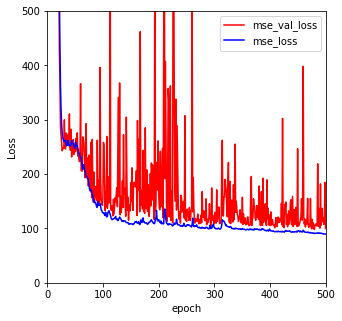

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 8)                 1024      
_________________________________________________________________
batch_normalization_105 (Bat (None, 8)                 32        
_________________________________________________________________
activation_105 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_111 (Dense)            (None, 8)                 72        
_________________________________________________________________
batch_normalization_106 (Bat (None, 8)                 32        
_________________________________________________________________
activation_106 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_112 (Dense)            (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 2s 13ms/step - loss: 12378.5020 - val_loss: 12355.9336: 1
Epoch 2/500
165/165 [==============================] - 2s 11ms/step - loss: 12106.9697 - val_loss: 12085.8799
Epoch 3/500
165/165 [==============================] - 2s 11ms/step - loss: 11766.1777 - val_loss: 11451.0957
Epoch 4/500
165/165 [==============================] - 2s 11ms/step - loss: 11303.8145 - val_loss: 9892.4473
Epoch 5/500
165/165 [==============================] - 2s 11ms/step - loss: 10690.3125 - val_loss: 10115.8838
Epoch 6/500
165/165 [==============================] - 2s 11ms/step - loss: 10003.8301 - val_loss: 9675.7734
Epoch 7/500
165/165 [==============================] - 2s 11ms/step - loss: 9259.3311 - val_loss: 9220.0518
Epoch 8/500
165/165 [==============================] - 2s 11ms/step - loss: 8471.9883 - val_loss: 7367.6177
Epoch 9/500
165/165 [==============================] - 2s 11ms/step - loss: 7682.8926 - val_loss: 7264.9536
Epoch 10/500
16

165/165 [==============================] - 2s 10ms/step - loss: 250.2589 - val_loss: 260.2677
Epoch 78/500
165/165 [==============================] - 2s 10ms/step - loss: 246.5319 - val_loss: 239.3481
Epoch 79/500
165/165 [==============================] - 2s 11ms/step - loss: 251.2995 - val_loss: 255.8787
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 246.4509 - val_loss: 244.5150
Epoch 81/500
165/165 [==============================] - 2s 10ms/step - loss: 241.6509 - val_loss: 228.6660
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 248.4642 - val_loss: 256.9294
Epoch 83/500
165/165 [==============================] - 2s 11ms/step - loss: 243.9913 - val_loss: 253.7012
Epoch 84/500
165/165 [==============================] - 2s 10ms/step - loss: 239.5600 - val_loss: 242.1552
Epoch 85/500
165/165 [==============================] - 2s 11ms/step - loss: 236.3156 - val_loss: 247.1880
Epoch 86/500
165/165 [============================

165/165 [==============================] - 2s 11ms/step - loss: 121.6253 - val_loss: 628.8359
Epoch 154/500
165/165 [==============================] - 2s 10ms/step - loss: 123.3524 - val_loss: 173.5537
Epoch 155/500
165/165 [==============================] - 2s 11ms/step - loss: 125.1659 - val_loss: 314.1222
Epoch 156/500
165/165 [==============================] - 2s 10ms/step - loss: 124.4229 - val_loss: 201.2024
Epoch 157/500
165/165 [==============================] - 2s 10ms/step - loss: 127.9261 - val_loss: 303.3357
Epoch 158/500
165/165 [==============================] - 2s 11ms/step - loss: 125.9913 - val_loss: 200.5519
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 133.6082 - val_loss: 236.1246
Epoch 160/500
165/165 [==============================] - 2s 10ms/step - loss: 137.0491 - val_loss: 162.7316
Epoch 161/500
165/165 [==============================] - 2s 11ms/step - loss: 123.1934 - val_loss: 154.3097
Epoch 162/500
165/165 [===================

Epoch 229/500
165/165 [==============================] - 2s 10ms/step - loss: 114.1480 - val_loss: 154.1722
Epoch 230/500
165/165 [==============================] - 2s 10ms/step - loss: 115.3759 - val_loss: 140.7303
Epoch 231/500
165/165 [==============================] - 2s 11ms/step - loss: 113.4882 - val_loss: 193.2385
Epoch 232/500
165/165 [==============================] - 2s 10ms/step - loss: 114.5154 - val_loss: 389.1688
Epoch 233/500
165/165 [==============================] - 2s 10ms/step - loss: 112.9490 - val_loss: 120.8152
Epoch 234/500
165/165 [==============================] - 2s 10ms/step - loss: 110.9440 - val_loss: 131.0912
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 109.1357 - val_loss: 124.2906
Epoch 236/500
165/165 [==============================] - 2s 10ms/step - loss: 115.1194 - val_loss: 216.5801
Epoch 237/500
165/165 [==============================] - 2s 11ms/step - loss: 109.6129 - val_loss: 132.6592
Epoch 238/500
165/165 [=====

Epoch 305/500
165/165 [==============================] - 2s 10ms/step - loss: 103.5424 - val_loss: 200.4361
Epoch 306/500
165/165 [==============================] - 2s 11ms/step - loss: 102.3712 - val_loss: 131.4486
Epoch 307/500
165/165 [==============================] - 2s 11ms/step - loss: 104.7632 - val_loss: 182.1300
Epoch 308/500
165/165 [==============================] - 2s 11ms/step - loss: 106.3186 - val_loss: 255.2592
Epoch 309/500
165/165 [==============================] - 2s 10ms/step - loss: 111.2787 - val_loss: 154.2353
Epoch 310/500
165/165 [==============================] - 2s 10ms/step - loss: 112.4115 - val_loss: 195.8333
Epoch 311/500
165/165 [==============================] - 2s 10ms/step - loss: 112.0036 - val_loss: 129.2461
Epoch 312/500
165/165 [==============================] - 2s 10ms/step - loss: 109.2037 - val_loss: 520.6661
Epoch 313/500
165/165 [==============================] - 2s 11ms/step - loss: 111.1479 - val_loss: 183.1167
Epoch 314/500
165/165 [=====

Epoch 381/500
165/165 [==============================] - 2s 10ms/step - loss: 109.5747 - val_loss: 127.0462
Epoch 382/500
165/165 [==============================] - 2s 10ms/step - loss: 108.3869 - val_loss: 127.0559
Epoch 383/500
165/165 [==============================] - 2s 10ms/step - loss: 107.8407 - val_loss: 126.3146
Epoch 384/500
165/165 [==============================] - 2s 10ms/step - loss: 106.5673 - val_loss: 155.4365
Epoch 385/500
165/165 [==============================] - 2s 10ms/step - loss: 104.5758 - val_loss: 119.8330
Epoch 386/500
165/165 [==============================] - 2s 10ms/step - loss: 104.3690 - val_loss: 244.9383
Epoch 387/500
165/165 [==============================] - 2s 10ms/step - loss: 103.9967 - val_loss: 113.7498
Epoch 388/500
165/165 [==============================] - 2s 11ms/step - loss: 103.0842 - val_loss: 240.3636
Epoch 389/500
165/165 [==============================] - 2s 10ms/step - loss: 104.8962 - val_loss: 123.2808
Epoch 390/500
165/165 [=====

165/165 [==============================] - 2s 11ms/step - loss: 97.8603 - val_loss: 110.1488
Epoch 458/500
165/165 [==============================] - 2s 10ms/step - loss: 97.4631 - val_loss: 128.4176
Epoch 459/500
165/165 [==============================] - 2s 10ms/step - loss: 96.6404 - val_loss: 136.1563
Epoch 460/500
165/165 [==============================] - 2s 10ms/step - loss: 96.0823 - val_loss: 107.3792
Epoch 461/500
165/165 [==============================] - 2s 11ms/step - loss: 95.5116 - val_loss: 124.1242
Epoch 462/500
165/165 [==============================] - 2s 11ms/step - loss: 96.0340 - val_loss: 107.7411
Epoch 463/500
165/165 [==============================] - 2s 11ms/step - loss: 95.8689 - val_loss: 119.3526
Epoch 464/500
165/165 [==============================] - 2s 11ms/step - loss: 96.9853 - val_loss: 139.0999
Epoch 465/500
165/165 [==============================] - 2s 11ms/step - loss: 99.6182 - val_loss: 149.9754
Epoch 466/500
165/165 [============================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  4.8419052432691805 
MAE:  8.722902504702974 
SD:  10.306159608649516


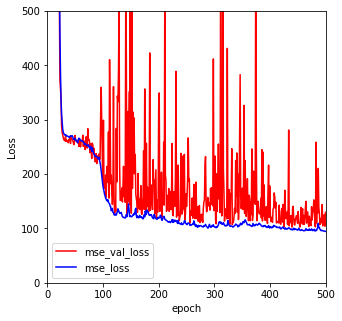

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  1.042113648552464 
Ensemble_std:  10.273418913750115


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 8)                 1024      
_________________________________________________________________
batch_normalization_126 (Bat (None, 8)                 32        
_________________________________________________________________
activation_126 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_133 (Dense)            (None, 8)                 72        
_________________________________________________________________
batch_normalization_127 (Bat (None, 8)                 32        
_________________________________________________________________
activation_127 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_134 (Dense)            (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 2s 13ms/step - loss: 3714.6606 - val_loss: 3737.1338
Epoch 2/500
165/165 [==============================] - 2s 11ms/step - loss: 3507.5618 - val_loss: 3405.9512
Epoch 3/500
165/165 [==============================] - 2s 11ms/step - loss: 3243.0776 - val_loss: 3089.1885
Epoch 4/500
165/165 [==============================] - 2s 11ms/step - loss: 2910.5498 - val_loss: 2764.0798
Epoch 5/500
165/165 [==============================] - 2s 11ms/step - loss: 2536.8662 - val_loss: 2148.6882
Epoch 6/500
165/165 [==============================] - 2s 11ms/step - loss: 2136.2627 - val_loss: 1815.5328
Epoch 7/500
165/165 [==============================] - 2s 11ms/step - loss: 1718.6030 - val_loss: 1581.4941
Epoch 8/500
165/165 [==============================] - 2s 11ms/step - loss: 1332.2218 - val_loss: 1171.0190
Epoch 9/500
165/165 [==============================] - 2s 11ms/step - loss: 999.2702 - val_loss: 869.6205
Epoch 10/500
165/165 [========

165/165 [==============================] - 2s 11ms/step - loss: 61.2115 - val_loss: 86.6697
Epoch 79/500
165/165 [==============================] - 2s 11ms/step - loss: 59.2323 - val_loss: 62.4501
Epoch 80/500
165/165 [==============================] - 2s 11ms/step - loss: 57.8529 - val_loss: 55.5025
Epoch 81/500
165/165 [==============================] - 2s 11ms/step - loss: 58.1025 - val_loss: 62.0758
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 56.3886 - val_loss: 80.1986
Epoch 83/500
165/165 [==============================] - 2s 11ms/step - loss: 55.4450 - val_loss: 64.4866
Epoch 84/500
165/165 [==============================] - 2s 11ms/step - loss: 54.4543 - val_loss: 53.3117
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 53.9030 - val_loss: 54.4586
Epoch 86/500
165/165 [==============================] - 2s 10ms/step - loss: 54.9837 - val_loss: 100.7651
Epoch 87/500
165/165 [==============================] - 2s 11ms/ste

165/165 [==============================] - 2s 10ms/step - loss: 37.5454 - val_loss: 42.9194
Epoch 156/500
165/165 [==============================] - 2s 11ms/step - loss: 37.9384 - val_loss: 57.2533
Epoch 157/500
165/165 [==============================] - 2s 10ms/step - loss: 38.7322 - val_loss: 44.5537
Epoch 158/500
165/165 [==============================] - 2s 10ms/step - loss: 37.3845 - val_loss: 56.0069
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 37.0430 - val_loss: 42.8060
Epoch 160/500
165/165 [==============================] - 2s 11ms/step - loss: 37.2994 - val_loss: 63.3406
Epoch 161/500
165/165 [==============================] - 2s 10ms/step - loss: 37.2166 - val_loss: 63.7364
Epoch 162/500
165/165 [==============================] - 2s 11ms/step - loss: 36.6519 - val_loss: 60.4536
Epoch 163/500
165/165 [==============================] - 2s 11ms/step - loss: 36.3101 - val_loss: 41.9268
Epoch 164/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 32.6996 - val_loss: 51.0497
Epoch 233/500
165/165 [==============================] - 2s 10ms/step - loss: 32.6895 - val_loss: 42.5666
Epoch 234/500
165/165 [==============================] - 2s 10ms/step - loss: 32.9543 - val_loss: 38.9834
Epoch 235/500
165/165 [==============================] - 2s 11ms/step - loss: 32.6513 - val_loss: 50.7209
Epoch 236/500
165/165 [==============================] - 2s 11ms/step - loss: 32.9620 - val_loss: 43.8780
Epoch 237/500
165/165 [==============================] - 2s 11ms/step - loss: 32.6398 - val_loss: 40.2011
Epoch 238/500
165/165 [==============================] - 2s 11ms/step - loss: 32.5869 - val_loss: 44.0420
Epoch 239/500
165/165 [==============================] - 2s 11ms/step - loss: 32.6191 - val_loss: 42.7340
Epoch 240/500
165/165 [==============================] - 2s 10ms/step - loss: 32.7495 - val_loss: 45.2092
Epoch 241/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 31.3888 - val_loss: 36.8254
Epoch 310/500
165/165 [==============================] - 2s 11ms/step - loss: 31.5414 - val_loss: 74.6492
Epoch 311/500
165/165 [==============================] - 2s 11ms/step - loss: 31.4622 - val_loss: 35.5406
Epoch 312/500
165/165 [==============================] - 2s 11ms/step - loss: 33.8576 - val_loss: 46.6953
Epoch 313/500
165/165 [==============================] - 2s 11ms/step - loss: 31.6118 - val_loss: 53.6569
Epoch 314/500
165/165 [==============================] - 2s 11ms/step - loss: 31.7831 - val_loss: 41.9967
Epoch 315/500
165/165 [==============================] - 2s 12ms/step - loss: 31.4491 - val_loss: 66.1047
Epoch 316/500
165/165 [==============================] - 2s 11ms/step - loss: 31.6479 - val_loss: 38.0633
Epoch 317/500
165/165 [==============================] - 2s 11ms/step - loss: 31.2481 - val_loss: 48.8383
Epoch 318/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 31.1396 - val_loss: 36.6501
Epoch 387/500
165/165 [==============================] - 2s 11ms/step - loss: 31.1244 - val_loss: 44.8163
Epoch 388/500
165/165 [==============================] - 2s 11ms/step - loss: 30.8591 - val_loss: 39.8968
Epoch 389/500
165/165 [==============================] - 2s 11ms/step - loss: 30.7508 - val_loss: 38.7836
Epoch 390/500
165/165 [==============================] - 2s 11ms/step - loss: 30.7768 - val_loss: 35.8597
Epoch 391/500
165/165 [==============================] - 2s 11ms/step - loss: 31.5731 - val_loss: 54.2013
Epoch 392/500
165/165 [==============================] - 2s 11ms/step - loss: 31.1474 - val_loss: 36.0502
Epoch 393/500
165/165 [==============================] - 2s 11ms/step - loss: 31.1284 - val_loss: 39.3033
Epoch 394/500
165/165 [==============================] - 2s 11ms/step - loss: 31.2360 - val_loss: 81.9267
Epoch 395/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 30.5927 - val_loss: 36.2423
Epoch 464/500
165/165 [==============================] - 2s 11ms/step - loss: 30.3744 - val_loss: 37.8354
Epoch 465/500
165/165 [==============================] - 2s 11ms/step - loss: 30.3000 - val_loss: 38.7502
Epoch 466/500
165/165 [==============================] - 2s 11ms/step - loss: 30.6234 - val_loss: 34.6118
Epoch 467/500
165/165 [==============================] - 2s 11ms/step - loss: 31.8171 - val_loss: 99.6728
Epoch 468/500
165/165 [==============================] - 2s 11ms/step - loss: 31.0774 - val_loss: 56.0663
Epoch 469/500
165/165 [==============================] - 2s 11ms/step - loss: 30.4870 - val_loss: 37.5067
Epoch 470/500
165/165 [==============================] - 2s 11ms/step - loss: 30.3251 - val_loss: 36.2355
Epoch 471/500
165/165 [==============================] - 2s 11ms/step - loss: 30.2431 - val_loss: 35.8140
Epoch 472/500
165/165 [==============================] - 2s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.01323045140450665 
MAE:  4.428357312605733 
SD:  6.041138602423505


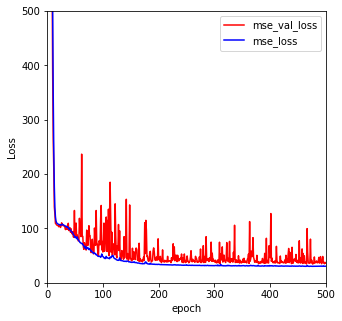

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 8)                 1024      
_________________________________________________________________
batch_normalization_147 (Bat (None, 8)                 32        
_________________________________________________________________
activation_147 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_155 (Dense)            (None, 8)                 72        
_________________________________________________________________
batch_normalization_148 (Bat (None, 8)                 32        
_________________________________________________________________
activation_148 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_156 (Dense)            (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 2s 13ms/step - loss: 3696.0144 - val_loss: 3706.5476
Epoch 2/500
165/165 [==============================] - 2s 11ms/step - loss: 3490.7959 - val_loss: 3467.6990
Epoch 3/500
165/165 [==============================] - 2s 11ms/step - loss: 3257.2048 - val_loss: 3349.0850
Epoch 4/500
165/165 [==============================] - 2s 11ms/step - loss: 2956.4221 - val_loss: 2627.9431
Epoch 5/500
165/165 [==============================] - 2s 11ms/step - loss: 2596.8679 - val_loss: 2386.6282
Epoch 6/500
165/165 [==============================] - 2s 11ms/step - loss: 2171.4954 - val_loss: 1987.0756
Epoch 7/500
165/165 [==============================] - 2s 11ms/step - loss: 1762.1978 - val_loss: 1435.5187
Epoch 8/500
165/165 [==============================] - 2s 11ms/step - loss: 1378.7898 - val_loss: 1118.4993
Epoch 9/500
165/165 [==============================] - 2s 11ms/step - loss: 1042.3131 - val_loss: 903.6013
Epoch 10/500
165/165 [=======

165/165 [==============================] - 2s 11ms/step - loss: 42.5718 - val_loss: 52.3350
Epoch 79/500
165/165 [==============================] - 2s 11ms/step - loss: 42.6371 - val_loss: 46.5124
Epoch 80/500
165/165 [==============================] - 2s 11ms/step - loss: 42.9968 - val_loss: 44.4413
Epoch 81/500
165/165 [==============================] - 2s 11ms/step - loss: 42.4037 - val_loss: 85.3105
Epoch 82/500
165/165 [==============================] - 2s 11ms/step - loss: 41.5490 - val_loss: 71.8849
Epoch 83/500
165/165 [==============================] - 2s 11ms/step - loss: 42.4057 - val_loss: 54.3738
Epoch 84/500
165/165 [==============================] - 2s 11ms/step - loss: 41.2719 - val_loss: 60.9872
Epoch 85/500
165/165 [==============================] - 2s 11ms/step - loss: 41.6297 - val_loss: 51.5140
Epoch 86/500
165/165 [==============================] - 2s 11ms/step - loss: 41.5897 - val_loss: 69.8298
Epoch 87/500
165/165 [==============================] - 2s 11ms/step

165/165 [==============================] - 2s 11ms/step - loss: 34.7855 - val_loss: 89.4902
Epoch 156/500
165/165 [==============================] - 2s 11ms/step - loss: 34.7535 - val_loss: 46.0144
Epoch 157/500
165/165 [==============================] - 2s 11ms/step - loss: 35.4280 - val_loss: 42.3557
Epoch 158/500
165/165 [==============================] - 2s 11ms/step - loss: 36.6028 - val_loss: 57.0219
Epoch 159/500
165/165 [==============================] - 2s 11ms/step - loss: 37.2689 - val_loss: 63.2532
Epoch 160/500
165/165 [==============================] - 2s 11ms/step - loss: 35.8586 - val_loss: 59.5308
Epoch 161/500
165/165 [==============================] - 2s 11ms/step - loss: 35.7063 - val_loss: 42.4830
Epoch 162/500
165/165 [==============================] - 2s 11ms/step - loss: 34.8058 - val_loss: 40.3623
Epoch 163/500
165/165 [==============================] - 2s 11ms/step - loss: 35.3302 - val_loss: 38.6040
Epoch 164/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 32.5573 - val_loss: 39.3302
Epoch 233/500
165/165 [==============================] - 2s 11ms/step - loss: 32.3566 - val_loss: 47.3690
Epoch 234/500
165/165 [==============================] - 2s 11ms/step - loss: 32.2191 - val_loss: 36.6211
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 32.3814 - val_loss: 37.8631
Epoch 236/500
165/165 [==============================] - 2s 10ms/step - loss: 32.3993 - val_loss: 49.1043
Epoch 237/500
165/165 [==============================] - 2s 10ms/step - loss: 32.3635 - val_loss: 36.3011
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 32.3412 - val_loss: 37.3107
Epoch 239/500
165/165 [==============================] - 2s 11ms/step - loss: 32.1751 - val_loss: 47.0534
Epoch 240/500
165/165 [==============================] - 2s 11ms/step - loss: 32.4179 - val_loss: 42.3126
Epoch 241/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 10ms/step - loss: 31.4423 - val_loss: 41.4791
Epoch 310/500
165/165 [==============================] - 2s 10ms/step - loss: 31.1612 - val_loss: 37.9869
Epoch 311/500
165/165 [==============================] - 2s 10ms/step - loss: 31.4752 - val_loss: 54.0223
Epoch 312/500
165/165 [==============================] - 2s 11ms/step - loss: 31.4124 - val_loss: 40.0069
Epoch 313/500
165/165 [==============================] - 2s 10ms/step - loss: 31.2771 - val_loss: 38.9748
Epoch 314/500
165/165 [==============================] - 2s 10ms/step - loss: 31.2305 - val_loss: 39.0857
Epoch 315/500
165/165 [==============================] - 2s 10ms/step - loss: 31.1940 - val_loss: 40.4923
Epoch 316/500
165/165 [==============================] - 2s 11ms/step - loss: 31.8630 - val_loss: 36.7708
Epoch 317/500
165/165 [==============================] - 2s 10ms/step - loss: 31.2782 - val_loss: 42.6770
Epoch 318/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 30.9752 - val_loss: 34.8707
Epoch 387/500
165/165 [==============================] - 2s 11ms/step - loss: 30.8564 - val_loss: 62.3951
Epoch 388/500
165/165 [==============================] - 2s 11ms/step - loss: 31.0125 - val_loss: 35.3192
Epoch 389/500
165/165 [==============================] - 2s 11ms/step - loss: 31.0337 - val_loss: 38.1903
Epoch 390/500
165/165 [==============================] - 2s 11ms/step - loss: 31.1440 - val_loss: 92.7074
Epoch 391/500
165/165 [==============================] - 2s 11ms/step - loss: 30.9795 - val_loss: 35.9497
Epoch 392/500
165/165 [==============================] - 2s 11ms/step - loss: 31.1017 - val_loss: 40.1446
Epoch 393/500
165/165 [==============================] - 2s 11ms/step - loss: 30.9772 - val_loss: 38.1393
Epoch 394/500
165/165 [==============================] - 2s 11ms/step - loss: 30.8921 - val_loss: 37.5123
Epoch 395/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 10ms/step - loss: 30.8109 - val_loss: 80.9520
Epoch 464/500
165/165 [==============================] - 2s 10ms/step - loss: 30.6922 - val_loss: 40.1521
Epoch 465/500
165/165 [==============================] - 2s 10ms/step - loss: 30.4325 - val_loss: 35.9696
Epoch 466/500
165/165 [==============================] - 2s 10ms/step - loss: 30.8313 - val_loss: 57.2137
Epoch 467/500
165/165 [==============================] - 2s 10ms/step - loss: 31.6774 - val_loss: 35.0777
Epoch 468/500
165/165 [==============================] - 2s 10ms/step - loss: 30.8840 - val_loss: 36.2290
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 30.5525 - val_loss: 35.2815
Epoch 470/500
165/165 [==============================] - 2s 10ms/step - loss: 30.5674 - val_loss: 39.0113
Epoch 471/500
165/165 [==============================] - 2s 10ms/step - loss: 31.3043 - val_loss: 40.7912
Epoch 472/500
165/165 [==============================] - 2s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.5690157472269776 
MAE:  4.396892628270079 
SD:  5.904346263680352


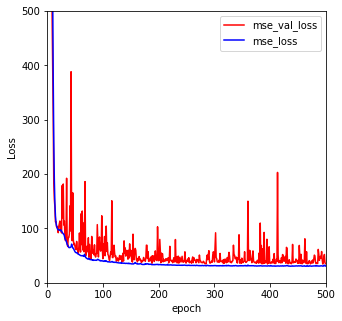

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 8)                 1024      
_________________________________________________________________
batch_normalization_168 (Bat (None, 8)                 32        
_________________________________________________________________
activation_168 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_177 (Dense)            (None, 8)                 72        
_________________________________________________________________
batch_normalization_169 (Bat (None, 8)                 32        
_________________________________________________________________
activation_169 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_178 (Dense)            (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 2s 12ms/step - loss: 3677.6626 - val_loss: 3679.7021
Epoch 2/500
165/165 [==============================] - 2s 10ms/step - loss: 3471.3064 - val_loss: 3349.3345
Epoch 3/500
165/165 [==============================] - 2s 10ms/step - loss: 3233.3701 - val_loss: 3048.6792
Epoch 4/500
165/165 [==============================] - 2s 10ms/step - loss: 2940.5764 - val_loss: 3068.2471
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 2588.1116 - val_loss: 2324.6509
Epoch 6/500
165/165 [==============================] - 2s 10ms/step - loss: 2178.0339 - val_loss: 1889.6835
Epoch 7/500
165/165 [==============================] - 2s 10ms/step - loss: 1769.0425 - val_loss: 1552.6787
Epoch 8/500
165/165 [==============================] - 2s 10ms/step - loss: 1382.4397 - val_loss: 1120.4761
Epoch 9/500
165/165 [==============================] - 2s 10ms/step - loss: 1038.8549 - val_loss: 882.8595
Epoch 10/500
165/165 [=======

165/165 [==============================] - 2s 11ms/step - loss: 41.5936 - val_loss: 49.3235
Epoch 79/500
165/165 [==============================] - 2s 11ms/step - loss: 40.8129 - val_loss: 77.4541
Epoch 80/500
165/165 [==============================] - 2s 11ms/step - loss: 40.6791 - val_loss: 45.2619
Epoch 81/500
165/165 [==============================] - 2s 11ms/step - loss: 40.7032 - val_loss: 65.6068
Epoch 82/500
165/165 [==============================] - 2s 11ms/step - loss: 40.4113 - val_loss: 53.1303
Epoch 83/500
165/165 [==============================] - 2s 11ms/step - loss: 40.2274 - val_loss: 63.8923
Epoch 84/500
165/165 [==============================] - 2s 11ms/step - loss: 39.5636 - val_loss: 55.8534
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 39.3119 - val_loss: 46.1907
Epoch 86/500
165/165 [==============================] - 2s 10ms/step - loss: 38.8100 - val_loss: 44.8696
Epoch 87/500
165/165 [==============================] - 2s 11ms/step

165/165 [==============================] - 2s 11ms/step - loss: 34.1329 - val_loss: 39.5983
Epoch 156/500
165/165 [==============================] - 2s 11ms/step - loss: 34.4202 - val_loss: 53.9626
Epoch 157/500
165/165 [==============================] - 2s 11ms/step - loss: 34.8227 - val_loss: 71.7672
Epoch 158/500
165/165 [==============================] - 2s 12ms/step - loss: 34.5037 - val_loss: 43.6280
Epoch 159/500
165/165 [==============================] - 2s 11ms/step - loss: 34.3408 - val_loss: 49.6622
Epoch 160/500
165/165 [==============================] - 2s 11ms/step - loss: 34.3914 - val_loss: 63.9953
Epoch 161/500
165/165 [==============================] - 2s 11ms/step - loss: 34.1681 - val_loss: 55.1741
Epoch 162/500
165/165 [==============================] - 2s 11ms/step - loss: 34.2147 - val_loss: 74.6536
Epoch 163/500
165/165 [==============================] - 2s 11ms/step - loss: 34.1608 - val_loss: 38.2767
Epoch 164/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 33.0175 - val_loss: 49.1837
Epoch 233/500
165/165 [==============================] - 2s 10ms/step - loss: 33.1365 - val_loss: 56.1418
Epoch 234/500
165/165 [==============================] - 2s 11ms/step - loss: 33.5357 - val_loss: 77.0648
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 33.0201 - val_loss: 37.0638
Epoch 236/500
165/165 [==============================] - 2s 10ms/step - loss: 33.0414 - val_loss: 79.6450
Epoch 237/500
165/165 [==============================] - 2s 11ms/step - loss: 32.8854 - val_loss: 39.4066
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 32.9894 - val_loss: 47.7427
Epoch 239/500
165/165 [==============================] - 2s 10ms/step - loss: 32.8781 - val_loss: 47.6950
Epoch 240/500
165/165 [==============================] - 2s 11ms/step - loss: 32.9086 - val_loss: 46.8740
Epoch 241/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 10ms/step - loss: 32.2975 - val_loss: 41.6738
Epoch 310/500
165/165 [==============================] - 2s 10ms/step - loss: 32.0206 - val_loss: 38.3854
Epoch 311/500
165/165 [==============================] - 2s 10ms/step - loss: 32.1272 - val_loss: 35.8232
Epoch 312/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8953 - val_loss: 37.1923
Epoch 313/500
165/165 [==============================] - 2s 10ms/step - loss: 32.2006 - val_loss: 55.9827
Epoch 314/500
165/165 [==============================] - 2s 10ms/step - loss: 32.1260 - val_loss: 37.1858
Epoch 315/500
165/165 [==============================] - 2s 10ms/step - loss: 32.2202 - val_loss: 36.2047
Epoch 316/500
165/165 [==============================] - 2s 10ms/step - loss: 32.0455 - val_loss: 36.7807
Epoch 317/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8441 - val_loss: 41.3470
Epoch 318/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 31.9903 - val_loss: 41.0222
Epoch 387/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8506 - val_loss: 37.7858
Epoch 388/500
165/165 [==============================] - 2s 10ms/step - loss: 32.0614 - val_loss: 37.4471
Epoch 389/500
165/165 [==============================] - 2s 10ms/step - loss: 32.0372 - val_loss: 47.5929
Epoch 390/500
165/165 [==============================] - 2s 10ms/step - loss: 31.9520 - val_loss: 41.3147
Epoch 391/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8201 - val_loss: 53.1421
Epoch 392/500
165/165 [==============================] - 2s 11ms/step - loss: 32.0626 - val_loss: 64.7023
Epoch 393/500
165/165 [==============================] - 2s 10ms/step - loss: 31.9313 - val_loss: 35.9321
Epoch 394/500
165/165 [==============================] - 2s 11ms/step - loss: 31.8961 - val_loss: 35.2715
Epoch 395/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 11ms/step - loss: 31.7748 - val_loss: 42.1924
Epoch 463/500
165/165 [==============================] - 2s 10ms/step - loss: 32.4569 - val_loss: 59.1845
Epoch 464/500
165/165 [==============================] - 2s 10ms/step - loss: 32.1128 - val_loss: 37.6521
Epoch 465/500
165/165 [==============================] - 2s 10ms/step - loss: 32.1210 - val_loss: 51.2591
Epoch 466/500
165/165 [==============================] - 2s 10ms/step - loss: 31.5330 - val_loss: 38.5896
Epoch 467/500
165/165 [==============================] - 2s 10ms/step - loss: 32.7936 - val_loss: 39.6481
Epoch 468/500
165/165 [==============================] - 2s 10ms/step - loss: 32.3004 - val_loss: 45.1744
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8547 - val_loss: 37.0624
Epoch 470/500
165/165 [==============================] - 2s 10ms/step - loss: 31.8033 - val_loss: 37.4889
Epoch 471/500
165/165 [==============================] - 2s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.7612950425025418 
MAE:  4.638151143457244 
SD:  5.928381240070159


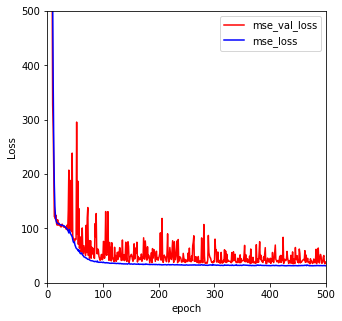

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 500])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.781180413711342 
Ensemble_std:  5.957955368724672
